https://dev.to/mage_ai/music-genre-classification-2jmc

## 1. Import libraries

In [71]:
import pandas as pd              # import pandas library
import numpy as np               # import numpy library
import matplotlib.pyplot as plt  # import matplotlib library
import seaborn as sns            # import seaborn library

## 2. Load the dataset using Pandas library and store it in a variable for easy access.

In [72]:
df = pd.read_csv('analysisData.csv', encoding = "ISO-8859-1")   # import data
df

,id,performer,song,genre,track_duration,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,rating
0,94500,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",166106.0,False,0.154,0.185,5,-14.063,1,0.0315,0.91100,0.000267,0.1120,0.150,83.969,4,36
1,64901,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",172066.0,False,0.588,0.672,11,-17.278,0,0.0361,0.00256,0.745000,0.1450,0.801,121.962,4,16
2,28440,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",211066.0,False,0.759,0.699,0,-5.745,0,0.0307,0.20200,0.000131,0.4430,0.907,92.960,4,70
3,19804,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']",208186.0,False,0.613,0.764,2,-6.509,1,0.1360,0.05270,0.000000,0.1970,0.417,160.015,4,64
4,83560,Tammy Wynette,'til I Can Make It On My Own,"['country', 'country dawn', 'nashville sound']",182080.0,False,0.450,0.294,7,-12.022,1,0.0318,0.83200,0.000035,0.1080,0.146,141.148,4,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19480,58564,The Trammps,Zing Went The Strings Of My Heart,"['disco', 'motown', 'philly soul', 'post-disco']",202693.0,False,0.667,0.851,4,-5.257,1,0.0629,0.03380,0.000001,0.3180,0.830,120.132,4,27
19481,82250,The Five Americans,Zip Code,"['bubblegum pop', 'classic garage rock', 'frea...",175040.0,False,0.393,0.594,9,-5.986,1,0.0267,0.03940,0.000000,0.0479,0.927,139.535,4,23
19482,33314,Bad Wolves,Zombie,"['alternative metal', 'metal', 'post-grunge']",254805.0,False,0.448,0.826,2,-3.244,0,0.0319,0.00756,0.000000,0.1170,0.190,77.093,4,49
19483,70738,Future,Zoom,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",278429.0,True,0.852,0.438,9,-7.673,1,0.4260,0.01450,0.000000,0.2630,0.627,150.945,4,21


## How many records and variables are there in the given dataset and what are the data types of variables?
We’ll use the **info()** function to check the number of records, variables, and data types of variables in the given dataset.

**Why is it important to understand the shape and data types of a dataset?**
* **Rows**: If there are too many rows, the algorithm takes too long to train, and if there are too few rows, the data may not be sufficient to produce good results.
* **Columns** or **features**: If the model has too many features (i.e., features equal to the number of rows), it may perform poorly.
* **Data types**: Understanding data types is important because it's possible that the data types of features are incorrect (i.e., numerical data saved in string format, etc.). In addition, if there are any categorical features, they must be converted into numerical data before being fed into a machine learning algorithm.


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19485 entries, 0 to 19484
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                19485 non-null  int64  
 1   performer         19485 non-null  object 
 2   song              19485 non-null  object 
 3   genre             19377 non-null  object 
 4   track_duration    19485 non-null  float64
 5   track_explicit    19485 non-null  bool   
 6   danceability      19485 non-null  float64
 7   energy            19485 non-null  float64
 8   key               19485 non-null  int64  
 9   loudness          19485 non-null  float64
 10  mode              19485 non-null  int64  
 11  speechiness       19485 non-null  float64
 12  acousticness      19485 non-null  float64
 13  instrumentalness  19485 non-null  float64
 14  liveness          19485 non-null  float64
 15  valence           19485 non-null  float64
 16  tempo             19485 non-null  float6

## Are there duplicated rows or columns?

Check for duplicate rows in the dataset with the duplicated() function. Except for the target variable, duplicate rows have the same values across all columns. So, we'll remove the target variable "rating" from the dataset and look for duplicate rows.

In [74]:
duplicateRows = df[df.duplicated(subset = df.columns.difference(['rating']))]
duplicateRows

,id,performer,song,genre,track_duration,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,rating


## Display the columns that have NaN values along with the count of NaN values.

We’ll use the **isnull()** and **any()** functions to display the columns that have null values and the sum() function to calculate the total number of null values in the column.

In [75]:
nan_col = df.columns[df.isnull().any()]
for i in nan_col:
    print(i, df[i].isnull().sum())


genre 108


**Why is it important to check for null values?**

As the machine learning algorithms don't work for data with null or NaN values, it’s good to check for null values in the data. Lets drop it...

## What’s the data distribution of predictor variables? Is data skewed or normally distributed?

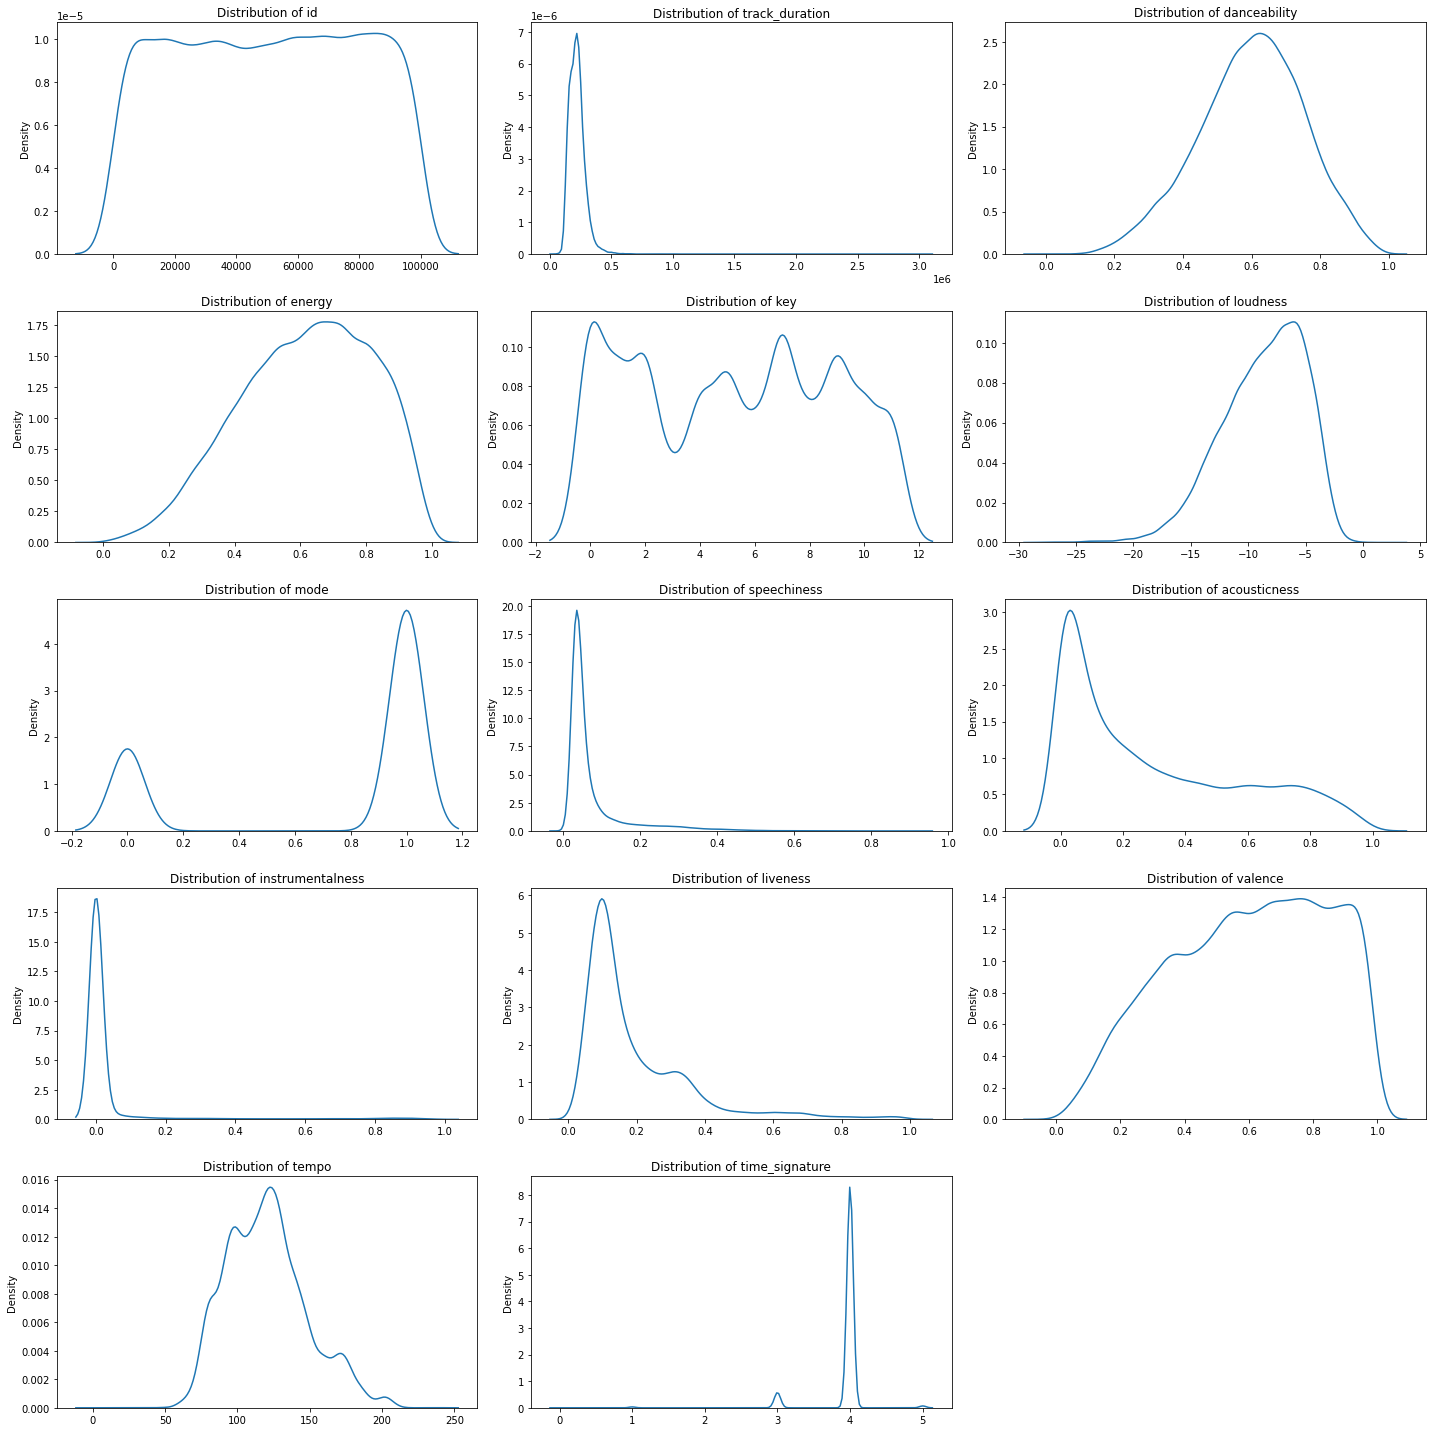

In [76]:
dfn = df.drop(['rating'], axis = 1)
df_cont = dfn.select_dtypes([int, float])           # store all integer or float columns in df_cont variable
fig = plt.figure(figsize = (20, 20))               # sets the size of the 4 plot with width as 15 and height as 18
for i, columns in enumerate(df_cont.columns, 1): 
   ax = plt.subplot(5, 3, i)                       # creates 3 subplots in one single row
   sns.kdeplot(x = df_cont[columns])               # creates kde plots for each feature in df_cont dataset
   ax.set_xlabel(None)                             # removes the labels on x-axis
   ax.set_title(f'Distribution of {columns}')      # adds a title to each subplot
   plt.tight_layout(w_pad = 1)                     # adds padding between the subplots
plt.show()                                         # displays the plots

The **skew()** function in the Pandas library is used to determine the amount of skewness in each column.

In [77]:
df_cont = df.select_dtypes([int,float])             # store all integer or float columns in df_cont variable
for i in df_cont.columns:
    skw = df_cont[i].skew()
    print(f'Skewness in {i} =',round(skw, 2),
          '☑' if -0.5 <= skw <= 0.5 else 'Left-skewed' if skw < -0.5 else 'Right-skewed')

Skewness in id = -0.02 ☑
Skewness in track_duration = 5.69 Right-skewed
Skewness in danceability = -0.24 ☑
Skewness in energy = -0.32 ☑
Skewness in key = 0.0 ☑
Skewness in loudness = -0.66 Left-skewed
Skewness in mode = -1.03 Left-skewed
Skewness in speechiness = 3.19 Right-skewed
Skewness in acousticness = 0.76 Right-skewed
Skewness in instrumentalness = 5.01 Right-skewed
Skewness in liveness = 2.1 Right-skewed
Skewness in valence = -0.27 ☑
Skewness in tempo = 0.51 Right-skewed
Skewness in time_signature = -4.33 Left-skewed
Skewness in rating = 0.02 ☑


If skewness is in between **-0.5** and **0.5**, the data is more or less **normally** distributed, otherwise the data is skewed. So, from the skewness table, we can say that except for some columns, all the other column distributions are either left-skewed or right-skewed.

**Note:** Columns like "key" are of categorical data type. As their values are in numerical format, they're identified as integer columns and hence their distributions are plotted. So, we can ignore these columns while analyzing the distributions.

**Why is it important to understand the distribution of features?**

Some algorithms work best if the data is normally distributed. So, it’s always recommended to check for the skewed distributions and transform them into normally distributed features (close to normal distribution) before feeding them into a machine learning algorithm.
## Are there outliers in the input variables?

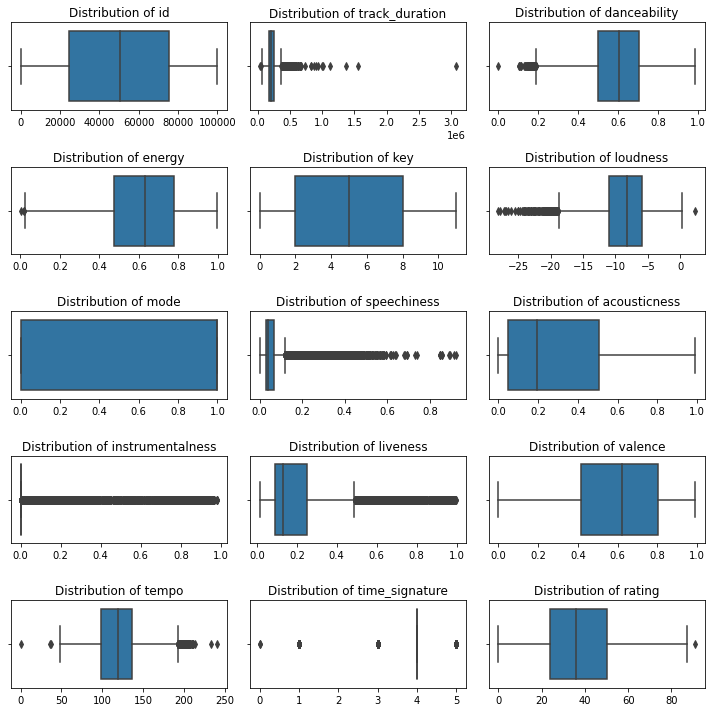

In [78]:
fig = plt.figure(figsize=(10, 10))                   # sets the size of the 4 plot with width as 10 and height as 10
for i, columns in enumerate(df_cont.columns, 1): 
   ax = plt.subplot(5, 3, i)                         # creates 3 subplots in one single row
   sns.boxplot(data = df_cont, x = df_cont[columns]) # creates box plots for each feature in df_cont dataset
   ax.set_xlabel(None)                               # removes the labels on x-axis
   ax.set_title(f'Distribution of {columns}')        # adds a title to each subplot
   plt.tight_layout(w_pad = 1)                         # adds padding between the subplots
plt.show()                                           # displays the plots

Outliers are represented as dots after the vertical lines on either side of the boxes. Except for some columns, all the other columns have outliers.

**Note:** While looking for outliers, we’ll not consider categorical columns that have values in number format.

**Why is it important to check for outliers in a dataset?**

Outliers affect the machine learning model’s performance. So, it’s important to check for outliers and treat them before feeding the data into an algorithm.

## How are the categories distributed in the target variable?
We’ll use the **countplot()** function from the seaborn library to plot the distribution of categories in the target variable.


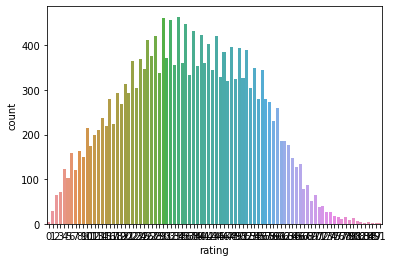

In [79]:
sns.countplot(data = df, x= df["rating"])
plt.show()

The distribution of classes looks almost balanced.

**Why is it important to check the distribution of categories?**

If the categories are imbalanced, then the obtained machine learning model may be biased. To avoid bias, we need to balance the categories by adding synthetic data.
## Is there a correlation between the input variables?
The following correlation map displays the correlation between all the numerical (int or float data type) columns.
* A correlation value of +1 indicates that there is a strong positive correlation between the columns.
* A correlation value of -1 indicates that there is a strong negative correlation between the columns.
* A correlation value of 0 indicates that no correlation exists between the columns.
We remove 1 of the columns from the dataset that shows a positive or negative correlation.

The **corr()** function from the Pandas library calculates the correlation between the variables, and the **heatmap()** function from the Seaborn library plots the values in the form of a graph.

<AxesSubplot:>

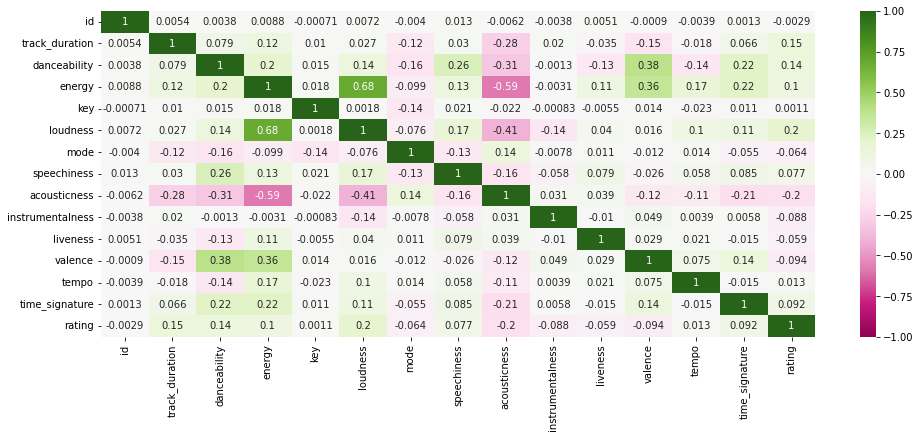

In [81]:
df_cont = df.select_dtypes([int,float])             # store all integer or float columns in df_cont variable
plt.figure(figsize=(16, 6))                         # set the output figure size
sns.heatmap(data = df_cont.corr(), vmin = -1, vmax = 1, annot = True, cmap="PiYG") 

# Time to work...
## 1. Fill null or NaN values

In [3]:
d = {1:1, 2:2, 3:3}
type(d.items())

dict_items

In [5]:
at_least_min_tokens = {key for key, value in d.items() if value >= 2}
type(at_least_min_tokens)

set

In [5]:
docs = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
unique_tokens = {token for doc in docs for token in doc}
unique_tokens

{1, 2, 3, 4, 5, 6, 7, 8, 9}

In [9]:
d = {"first_name": "Alfred", "last_name":"Hitchcock"}

for key in d.values():
    print(key)

Alfred
Hitchcock


In [14]:
def hh(x):
    if x> 3:
        return "pepe"
    
type(hh(2))

NoneType